<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/29%20-%20Modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
url = 'https://raw.githubusercontent.com/ZachNJIT/Covid19EisteinHospital/master/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PRE-PROCESSING

In [109]:
df = data.copy()
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create feature subsets (from our EDA)

In [110]:
missing_rate = df.isna().sum()/df.shape[0]

In [111]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [112]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [113]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Cleaning - Encoding

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [116]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [117]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [118]:
def encoding(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [119]:
def feature_engineering(df):
    df['is sick'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [120]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [121]:
def preprocessing(df):
    
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [122]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Evaluate

In [124]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [125]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

## Model Selection

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [127]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [128]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier())
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier())
SVM = make_pipeline(preprocessor, StandardScaler(), SVC())
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [129]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

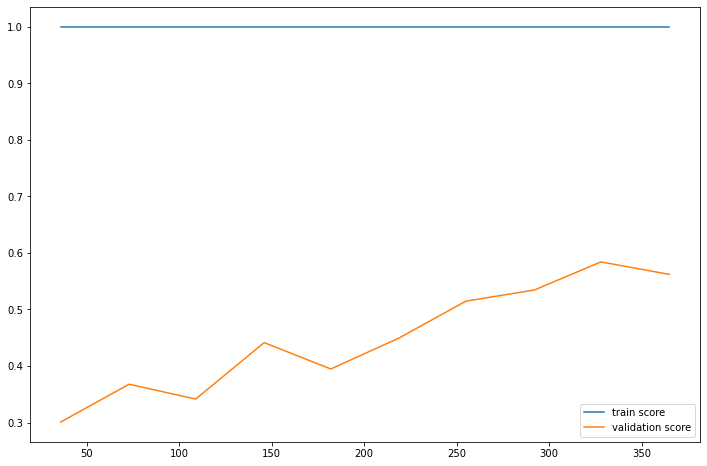

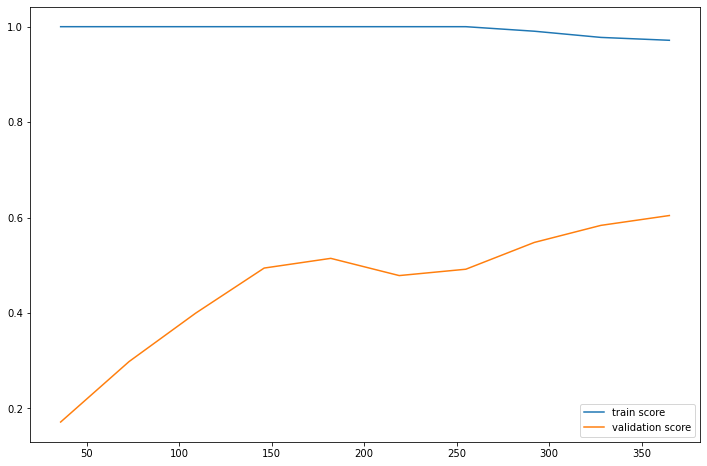

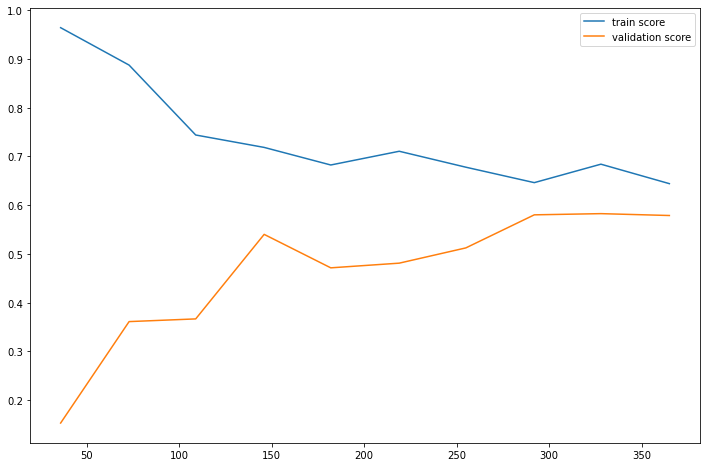

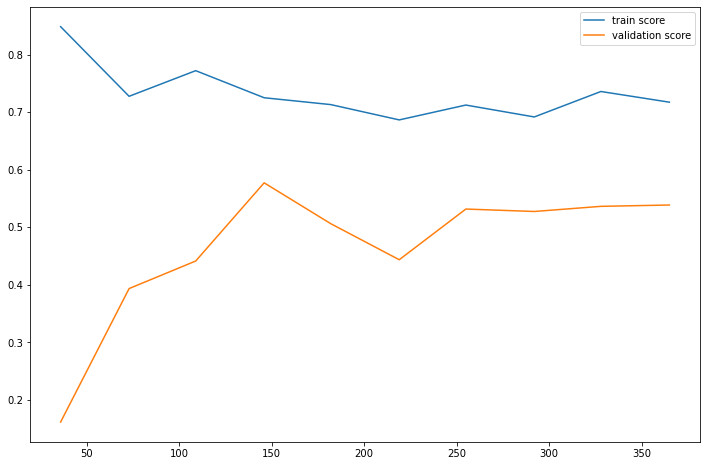

In [130]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMIZATION

Judging by the graph of the SVM, though it has the worst recall and f1 score, it appears to be least susceptible to overfitting, so may give more robust results should we wish to use it for future data. Let us see if we can optimize the recall score 

In [131]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [132]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [133]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [134]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 3000, 'pipeline__selectkbest__k': 47, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.67      0.50      0.57        16

    accuracy                           0.89       111
   macro avg       0.79      0.73      0.75       111
weighted avg       0.88      0.89      0.89       111



[[91  4]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.67      0.50      0.57        16

    accuracy                           0.89       111
   macro avg       0.79      0.73      0.75       111
weighted avg       0.88      0.89      0.89       111



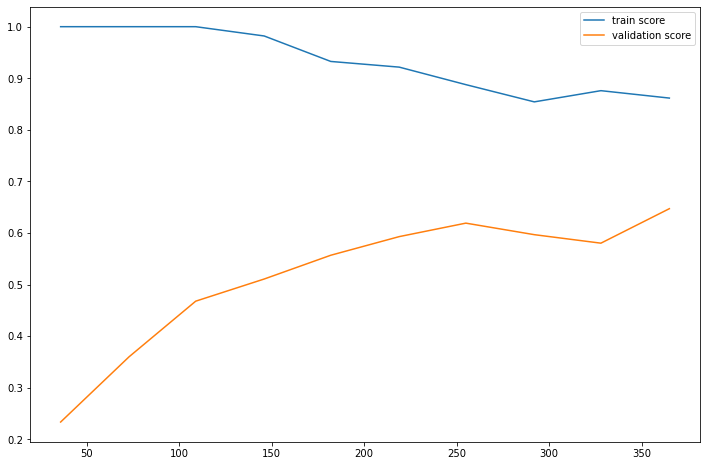

In [135]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

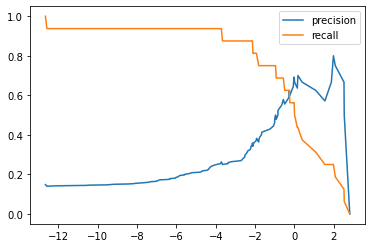

In [138]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [139]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

### Just eyeballing it, it appears that a threshold of -1 might be a good tradeoff between precision and recall, as we might want to focus on detecting positive cases over having an overall balance between precision and recall. Let us see what f1_score this corrsponds to.

In [140]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [141]:
from sklearn.metrics import recall_score

In [142]:
f1_score(y_test, y_pred)

0.6

In [143]:
recall_score(y_test, y_pred)

0.75

### Not bad, but we may be able to do better, especially on the f1_score, as we had to sacrifice a lot of precision to get decent recall. First, let us try the same grid search on RandomForest to see if we can improve upon either of those results

### We have to write a new evaluate function without a plot, as it takes too long to produce a plot with grid search.

In [144]:
def evaluationGrid(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [145]:
random_grid = {'n_estimators': [10, 50, 100, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2', 5, 10, 30],
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [1,2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                            n_iter = 300, cv = 4, scoring = 'recall', 
                            verbose=0, n_jobs = -1)

evaluationGrid(rf_random)
print(rf_random.best_params_)

[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 16}


### That did not appear to improve our result at all. Indeed, We tried an SVM since it was the only classifier that initially did not produce an overfitted model, but it is possible we are going at this the wrong way. Random Forest and Adaboost overfit because our dataset after preprocessing is small enough that they can easily memorize the positive cases and classify along those lines. To prevent this overfitting from occuring, another trick we can use is SMOTE to oversample from the minority class in order to create more class balance, which can help our classifier between differentiate between the two classes. Let us try this on one of our classifiers that had overfitting issues, say Random Forest:

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
smt = SMOTE(k_neighbors=5)

In [148]:
X_train, y_train = smt.fit_sample(X_train, y_train)

### Let us check that our positives and negatives are even now

In [149]:
np.bincount(y_train)

array([422, 422], dtype=int64)

### Great, let us try a Random Forest classifier on this new set:

In [152]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[87  8]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.50      0.50      0.50        16

    accuracy                           0.86       111
   macro avg       0.71      0.71      0.71       111
weighted avg       0.86      0.86      0.86       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_sel

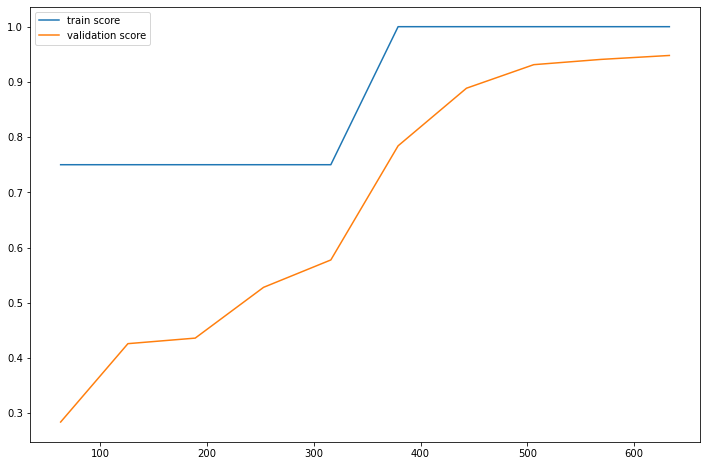

In [153]:
evaluation(RandomForest)

### Not as good as I had hoped. Though it certainly performs well on the validation set, and it does improve recall overall compared to the normal RandomForest, it does not improve recall to the point that it surpasses the SVM classifier. In a last ditch effort to salvage the Random Forest, let us try to use a grid search as well as SMOTE to find the best set of parameters for our Random Forest and see if we can surpass the SVM. Once we find the best set of parameters, we can also use this Random Forest in a majority vote ensemble method later.

In [154]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                            n_iter = 300, cv = 4, scoring = 'recall', 
                            verbose=0, n_jobs = -1)

evaluationGrid(rf_random)
print(rf_random.best_params_)

[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 32}


### Ok, the grid search is improving our f1 score, but recall is lower. Let us try SMOTE on AdaBoost:

[[86  9]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.53      0.62      0.57        16

    accuracy                           0.86       111
   macro avg       0.73      0.77      0.75       111
weighted avg       0.88      0.86      0.87       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_sel

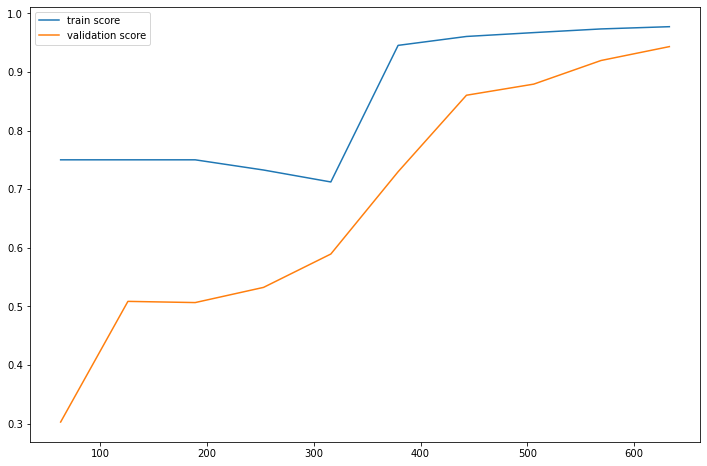

In [155]:
evaluation(AdaBoost)

### Not a bad result. f1 score decreases, but recall is up. Let us see if we can get any improvement by using a majority vote classifier. Since our original SMOTE random forest produced good results, we shall use it here:

In [156]:
from sklearn.ensemble import VotingClassifier

In [167]:
voting = VotingClassifier(estimators=[('SVM', grid), ('rf', RandomForest), ('gnb', AdaBoost)], voting='hard')

In [168]:
evaluationGrid(voting)

[[86  9]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.53      0.62      0.57        16

    accuracy                           0.86       111
   macro avg       0.73      0.77      0.75       111
weighted avg       0.88      0.86      0.87       111



### This recall isn't bad. If we wish to focus on recall at all costs, we could retain SVM with threshold -1 (that has recall of 0.75), but it is very possible that that classifier is sensitive to our particular set of training data. This majority vote ensemble method, with it's combination of several classifiers, is likely more robust.